In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
df = pd.read_csv("World_Population_cleaned.csv")

In [3]:
df.drop(df.loc[df['Fert. Rate'] == 'N.A.'].index, inplace=True)

In [4]:
df.drop(df.loc[df['Urban Pop %'] == 'N.A.'].index, inplace=True)

In [5]:
df['World Share']=df['World Share'].str.replace("%", "")

In [6]:
df['Yearly Change']=df['Yearly Change'].str.replace("%", "")

In [7]:
df['Urban Pop %']=df['Urban Pop %'].str.replace("%", "")

In [8]:
df['Fert. Rate']=df['Fert. Rate'].astype(float)

In [9]:
df['World Share']=df['World Share'].astype(float)

In [10]:
df['Yearly Change']=df['Yearly Change'].astype(float)

In [11]:
df['Urban Pop %']=df['Urban Pop %'].astype(float)

In [12]:
df['Med. Age']=df['Med. Age'].astype(float)

<AxesSubplot:>

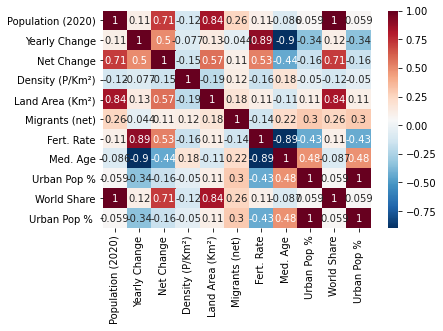

In [37]:
seabornInstance.heatmap(df.corr(), annot=True, cmap = 'RdBu_r')

In [13]:
# Note: Yearly Change and Fert. Rate would be my variables.
# Dependent Variable = Fert. Rate
# Independent Variable = Yearly Change

In [88]:
#Simple Linear Regression

x = df['Yearly Change'].values.reshape(-1,1)
y = df['Fert. Rate'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)
SLR = LinearRegression()
SLR.fit(x_train, y_train)

print("Fert. Rate = " + str(round(SLR.intercept_[0], 2)) + " + " + str(round(SLR.coef_[0][0], 2)) + "(Yearly Change)")
y_predicted = SLR.predict(x_test)

Fert. Rate = 1.46 + 1.08(Yearly Change)


In [89]:
#RMSE

y_predicted = SLR.predict(x_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print("RMSE: " + (str(round(RMSE, 2))))
print()


RMSE: 0.59



In [90]:
#Value range of the independent variable 

print("Yearly Change: " + str(df['Yearly Change'].max()))
print("Fert. Rate: " + str(df['Fert. Rate'].min()))
print("Range: " + str(df['Yearly Change'].max() - df['Fert. Rate'].min()))
print()


Yearly Change: 3.84
Fert. Rate: 1.1
Range: 2.7399999999999998



In [91]:
#R^2

print("R-squared: " + str(round(SLR.score(x,y), 2)))

R-squared: 0.79


In [92]:
X2 = df['Yearly Change']
y2 = df['Fert. Rate']

X3 = sm.add_constant(X2)
est = sm.OLS(y2, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             Fert. Rate   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     498.5
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           5.67e-46
Time:                        12:04:11   Log-Likelihood:                -113.10
No. Observations:                 130   AIC:                             230.2
Df Residuals:                     128   BIC:                             235.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5079      0.077     19.488

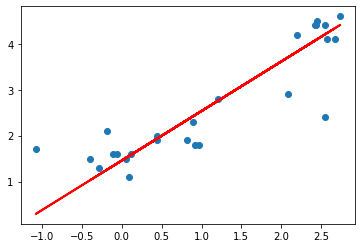

In [95]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predicted, color='red', linewidth=2)
plt.show()


In [101]:
#Multiple linear regression
#Let's check out this new function in the new statsmodel module
df = df.rename(columns={'Fert. Rate':'Fert_Rate', 'Yearly Change':'Yearly_Change'})
MLR = smf.ols('Fert_Rate ~ Yearly_Change', data=df).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fert_Rate   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     498.5
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           5.67e-46
Time:                        22:21:17   Log-Likelihood:                -113.10
No. Observations:                 130   AIC:                             230.2
Df Residuals:                     128   BIC:                             235.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5079      0.077     19.488      0.000       1.355       1.661
Yearly_Change     1.0368      0.046     22.328      0.000       0.945       1.129
==============================================================================
Omnibus:                        3.867   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                4.584
Skew:                          -0.074   Prob(JB):                        0.101
Kurtosis:                       3.908   Cond. No.                         3.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
df = df.rename(columns={'Urban Pop %':'Urban_Pop'})
MLR = smf.ols('Fert_Rate ~ Yearly_Change + Urban_Pop', data=df).fit()
MLR.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fert_Rate   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     278.1
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           3.99e-47
Time:                        22:21:34   Log-Likelihood:                -106.97
No. Observations:                 130   AIC:                             219.9
Df Residuals:                     127   BIC:                             228.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.0623      0.173     11.916      0.000       1.720       2.405
Yearly_Change     0.9797      0.047     20.713      0.000       0.886       1.073
Urban_Pop        -0.0083      0.002     -3.544      0.001      -0.013      -0.004
==============================================================================
Omnibus:                        2.549   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                2.139
Skew:                          -0.173   Prob(JB):                        0.343
Kurtosis:                       3.525   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

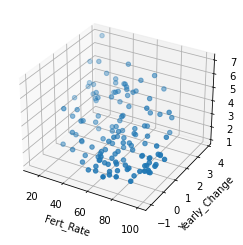

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['Urban_Pop'], df['Yearly_Change'], df['Fert_Rate'])
plt.xlabel('Fert_Rate')
plt.ylabel('Yearly_Change')
plt.show()